# Getting started with pySpectroWorks 

First we must import import the pySpectroWorks module.
We will also be using matplotlib for plotting and datetime for formatting timestamps. 
We will be using numpy for working with spectral data. 

In [61]:
# import dependencies
import pyspectroworks
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

We create a new connection to SpectroWorks using our API key. You can generate your own API keys by logging into SpectroWorks and then clicking your E-mail address in the top right corner, then "Profile" and then click "Create new API key". 

In [62]:
conn = pyspectroworks.connect('YjVlNjlmOGQtMGJjZi00OTIxLWE1ZTUtZjJjMTM2NTc2ZjEw')  # change this to match your API key

Projects can be accessed with the *get_projects()* method of the *connection* object. 

In [63]:
print('{: >6} {: >32} {: >24}'.format('Index', 'NAME', 'CREATED'))
projects = conn.get_projects()
for i, project in enumerate(projects):
    timestamp = datetime.utcfromtimestamp(project.created/1000).strftime('%Y-%m-%d %H:%M:%S')  # convert from unix timestamp to ISO time representation
    print('{: >6} {: >32} {: >24} '.format(i, project.project_name, timestamp))

 Index                             NAME                  CREATED
     0            Honey example project      2020-09-18 11:30:09 
     1   Brilliant Blue example project      2020-09-18 11:33:06 
     2 Starch in saliva example project      2020-09-18 11:35:07 


Here you have access to the three example projects. If you want to create these projects yourself then you can find the example data on https://cphnano.com/spectroworks/

You can access all the items in a project using its *get_items()* method. 

In [64]:
project = projects[0]  # change this to the project number you want to access
items = project.get_items()

Let's see how we can access the results of a specific item:

In [65]:
item = items[0]  # access the first item

print(', '.join(item.results.keys()))

sample_fit_quality, ref_fit_quality, convert_to_brix, refractive_index


These are the results available in this project. To get other results add them to your project in SpectroWorks. Let's extract the refractive index and brix values for this item:

In [66]:
ri = item.results['refractive_index']['value']   # extract the value of the refractive index result
brix = item.results['convert_to_brix']['value']  # extract the value of the brix result
print('{: >16} {: >16}'.format('Refractive Index', 'Degrees Brix'))
print('{: >16.6f} {: >16.2f}'.format(ri, brix))

Refractive Index     Degrees Brix
        1.507196            86.16


Now we will see how to work with spectral data:

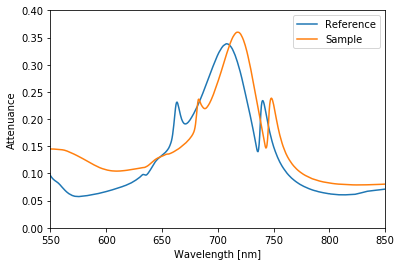

In [67]:
# Get reference and sample B side spectra. 
# The available spectrum types are: 'reference_B', 'Sample_A', 'sample_B' and 'sample_D'. 
ref_spectrum = np.array(item.get_spectrum('reference_B'))
sample_spectrum = np.array(item.get_spectrum('sample_B'))

plt.figure()                                                             # create a new figure
plt.plot(ref_spectrum[:, 0], ref_spectrum[:, 1], label='Reference')      # plot reference spectrum
plt.plot(sample_spectrum[:, 0], sample_spectrum[:, 1], label='Sample')   # plot sample spectrum
plt.xlim([550, 850])                                                     # set the wavelength range
plt.ylim(0.0, 0.4)                                                       # set the attenuance range
plt.legend()                                                             # show legends
plt.xlabel('Wavelength [nm]')                                            # label the X-axis
plt.ylabel('Attenuance')                                                 # label the Y-axis
plt.show()                                                               # show the figure

Notice the shift between the reference and the sample. This is due to the sample having a higher refractive index than the reference. 